## Model Training

#### 1.1 Import Data and Required Packages
##### Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [28]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
#from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

#### Import the CSV Data as Pandas DataFrame

In [5]:
df = pd.read_csv('data/raw.csv')

#### Show Top 5 Records

In [6]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#### Preparing X and Y variables

In [7]:
# Independant features
X = df.drop(columns=['math_score'],axis=1)

In [8]:
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [9]:
print("Categories in 'gender' variable:     ",end=" " )
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable:  ",end=" ")
print(df['race_ethnicity'].unique())

print("Categories in'parental level of education' variable:",end=" " )
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable:     ",end=" " )
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:     ",end=" " )
print(df['test_preparation_course'].unique())

Categories in 'gender' variable:      ['female' 'male']
Categories in 'race_ethnicity' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:      ['standard' 'free/reduced']
Categories in 'test preparation course' variable:      ['none' 'completed']


In [10]:
# dependant feayure values
y = df['math_score']

In [11]:
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math_score, Length: 1000, dtype: int64

In [13]:
# Create Column Transformer with 3 types of transformers
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

# Numerical and categorical features
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

# Peforming std scaling on numerical features
numeric_transformer = StandardScaler()
# Peforming onehotencoding on categorical features
oh_transformer = OneHotEncoder()

# Performing combine column tranformation
preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
        ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [14]:
# Applying all in combine transformation
X = preprocessor.fit_transform(X)

In [15]:
# Shape
X.shape

(1000, 19)

In [16]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((800, 19), (200, 19))

#### Create an Evaluate Function to give all metrics after model Training

In [17]:
# Defning function for evaluation of model
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

## Training diffrent models

# Dictionary of different machine learning models
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "AdaBoost Regressor": AdaBoostRegressor()
}

# Lists to store model names and their R2 scores
model_list = []
r2_list = []

# Iterate through each model in the dictionary
for i in range(len(list(models))):
    model = list(models.values())[i]  # Get the model instance
    model.fit(X_train, y_train)  # Train the model

    # Make predictions on training and test sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate the model on the training data
    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    # Evaluate the model on the test data
    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    # Print the model name
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])  # Add model name to the list
    
    # Print model performance metrics for the training set
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))
    print('----------------------------------')
    
    # Print model performance metrics for the test set
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)  # Add R2 score to the list
    
    print('='*35)
    print('\n')


In [31]:
## Traning diffrent models

# Define a dictionary with the best hyperparameters for tuning each model
model_hyperparameters = {
    "Linear Regression": {},
    "Lasso": {
        "alpha": [0.01, 0.1, 1, 10, 100],
        "max_iter": [1000, 5000, 10000]
    },
    "Ridge": {
        "alpha": [0.01, 0.1, 1, 10, 100],
        "solver": ["auto", "svd", "cholesky", "lsqr", "sag"]
    },
    "K-Neighbors Regressor": {
        "n_neighbors": [3, 5, 7, 9],
        "weights": ["uniform", "distance"],
        "algorithm": ["auto", "ball_tree", "kd_tree", "brute"]
    },
    "Decision Tree": {
        "max_depth": [None, 10, 20, 30],
        "min_samples_split": [2, 10, 20],
        "min_samples_leaf": [1, 5, 10]
    },
    "Random Forest Regressor": {
        "n_estimators": [100, 200, 500],
        "max_features": ["sqrt", "log2"],  # Corrected here
        "max_depth": [None, 10, 20, 30],
        "min_samples_split": [2, 10, 20],
        "min_samples_leaf": [1, 5, 10]
    },
    "XGBRegressor": {
        "n_estimators": [100, 200, 500],
        "max_depth": [3, 6, 9],
        "learning_rate": [0.01, 0.1, 0.3],
        "subsample": [0.6, 0.8, 1.0],
        "colsample_bytree": [0.6, 0.8, 1.0]
    },
    "AdaBoost Regressor": {
        "n_estimators": [50, 100, 200],
        "learning_rate": [0.01, 0.1, 1, 10]
    }
}

# Dictionary of different machine learning models
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(),
    "AdaBoost Regressor": AdaBoostRegressor()
}

# Lists to store model names and their R2 scores
model_list = []
r2_list = []

# Iterate through each model in the dictionary
for model_name, model in models.items():
    # If the model has hyperparameters, perform RandomizedSearchCV
    if model_name in model_hyperparameters and model_hyperparameters[model_name]:
        param_grid = model_hyperparameters[model_name]
        model = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=10, cv=3, n_jobs=-1, random_state=42)
    
    model.fit(X_train, y_train)  # Train the model

    # Make predictions on training and test sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate the model on the training data
    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    # Evaluate the model on the test data
    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    # Print the model name
    print(model_name)
    model_list.append(model_name)  # Add model name to the list
    
    # Print model performance metrics for the training set
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))
    print('----------------------------------')
    
    # Print model performance metrics for the test set
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)  # Add R2 score to the list
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 5.3243
- Mean Absolute Error: 4.2671
- R2 Score: 0.8743
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3960
- Mean Absolute Error: 4.2158
- R2 Score: 0.8803


Lasso
Model performance for Training set
- Root Mean Squared Error: 5.3240
- Mean Absolute Error: 4.2664
- R2 Score: 0.8743
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3837
- Mean Absolute Error: 4.2046
- R2 Score: 0.8809


Ridge
Model performance for Training set
- Root Mean Squared Error: 5.3233
- Mean Absolute Error: 4.2650
- R2 Score: 0.8743
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3904
- Mean Absolute Error: 4.2111
- R2 Score: 0.8806


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 0.2795
- Mean Absolute Error: 0.0187
- R2 Score: 0.9997
-----------------------

### Results

In [32]:
# Create a DataFrame with model names and their corresponding R2 scores
model_r2_score = pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score'])

# Sort the DataFrame by R2_Score in descending order
model_r2_score = model_r2_score.sort_values(by=["R2_Score"], ascending=False)

# Display the sorted DataFrame
model_r2_score

,Model Name,R2_Score
1,Lasso,0.880888
2,Ridge,0.880593
0,Linear Regression,0.880345
6,XGBRegressor,0.865237
7,AdaBoost Regressor,0.854527
4,Decision Tree,0.829186
5,Random Forest Regressor,0.808101
3,K-Neighbors Regressor,0.785619


#### <u>Linear Regression</u>

In [34]:
# Fitting linear regression model

lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 88.03


#### Plot y_pred and y_test

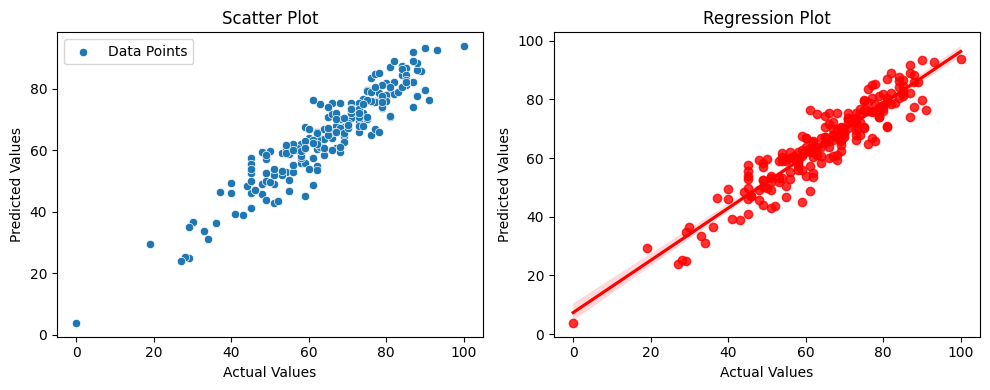

In [42]:
## Plotting regression plot

# Create a figure and subplots
fig, ax = plt.subplots(1, 2, figsize=(10,4))

# Scatter plot on the first subplot
sns.scatterplot(x=y_test, y=y_pred, label='Data Points', ax=ax[0])
ax[0].set_title('Scatter Plot')
ax[0].set_xlabel('Actual Values')
ax[0].set_ylabel('Predicted Values')

# Regression plot on the second subplot
sns.regplot(x=y_test, y=y_pred, scatter=True, label='Regression Line', color='red', ax=ax[1])
ax[1].set_title('Regression Plot')
ax[1].set_xlabel('Actual Values')
ax[1].set_ylabel('Predicted Values')

# Show plot
plt.tight_layout()
plt.show()

#### Difference between Actual and Predicted Values

In [45]:
# Diffrence betwwen actual and predicted value
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df.head()

,Actual Value,Predicted Value,Difference
521,91,76.507812,14.492188
737,53,58.953125,-5.953125
740,80,76.960938,3.039062
660,74,76.757812,-2.757812
411,84,87.539062,-3.539062
